Lakukan pemodelan untuk data Titanic dengan menggunakan :
1.	Regresi Logistik
2.	KNN
3.	Decision Tree
4.  SVM
5.  Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r'//content/drive/MyDrive/Bahan port/Klasifikasi/Titanic/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing Data

In [5]:
round(df.isnull().sum()/df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
mode_Embarked = df['Embarked'].mode()[0] #kasih 0 biar ke deteck modusnya
df['Embarked'] = df['Embarked'].fillna(mode_Embarked)

In [7]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Kalau berdistribusi normal atau paling tidak kurvanya simetris bisa pakai mean kalau terindikasi skewness pakai median kalau kategori pakai modus

Sebelum mendapatkan akurasi dari masing-masing model, lakukan pre-processing data meliputi :
-	Cek dan handling missing value (Jika missing value > 30%  bisa dipertimbangkan untuk dihapus
-	Features yang memiliki missing value < 30% bisa dilakukan imputasi sesuai dengan jenis data (mean, median, modus)
-	Encoding feature Sex menjadi numerical feature
-	Encoding feature Embarked menjadi dummy variable
-	Cek outlier pada features kontinyu, dan lakukan handling outlier dengan melakukan transformasi/scaling
a.	Min Max Scaler
b.	Standardized Scaler
c.	Robust Scaler


In [8]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
df['Sex'] = lE.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Emb'])

In [9]:
#Check missing value
#MEMBUAT DISTRIBUTION PLOT UNTUK MENENTUKAN VARIABEL TERSEBUT CENDERUNG SIMETRIS ATAU TIDAK
round(df.isnull().sum()/df.shape[0]*100, 2) # JUMLAH BARISNYA 100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Emb_C           0.00
Emb_Q           0.00
Emb_S           0.00
dtype: float64

<ipython-input-10-ec40e113a153>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

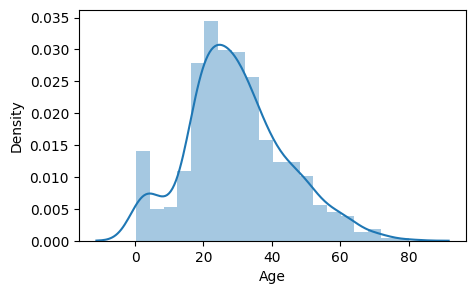

In [10]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(df['Age'])

In [11]:
#Handling missing value
#handling median karena Fare ada skewness
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Emb_C        891 non-null    uint8  
 12  Emb_Q        891 non-null    uint8  
 13  Emb_S        891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [13]:
#DETECTION OUTLIER

def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

In [14]:
for j in df.columns.drop(['Cabin','Name','Ticket','Emb_C','Emb_Q','Emb_S','PassengerId','Survived','Pclass','Sex','SibSp','Parch']) :
      Q1 = df[j].describe()['25%']
      Q3 = df[j].describe()['75%']
      IQR = Q3 - Q1
      batas_bawah= Q1-(1.5*IQR)
      batas_atas = Q3+(1.5*IQR)
      if find_outlier(df[j]) == '':
        print('Feature {} has no Outlier'.format(j))
      else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(df[j]).split(',')))-1))
        print(find_outlier(df[j])) #variabel yang di drop adalah yang tidak dicari outliernya

Feature Age has 66 Outlier which is:
2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0, 
Feature Fare has 116 Outlier which is:
71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9

In [15]:
##HANDLING OUTLIER
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
#Scalling Features with Outliers dengan minmax
df['Age'] = MinMaxScaler().fit_transform(np.array(df['Age']).reshape(-1, 1))
df['Fare'] = MinMaxScaler().fit_transform(np.array(df['Fare']).reshape(-1, 1))

In [16]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,0,0,1


# Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emb_C','Emb_Q','Emb_S']].values
y = df[['Survived']].values
#splitting training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
#LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #digunakan sebagai model
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred)) #mencari akurasi untuk data testing

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


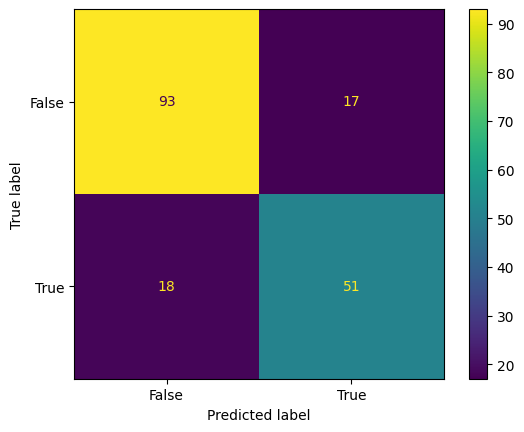

In [20]:
from sklearn import metrics
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred)
cm_display_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False, True])

cm_display_lr.plot()
plt.show()

In [21]:
#KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


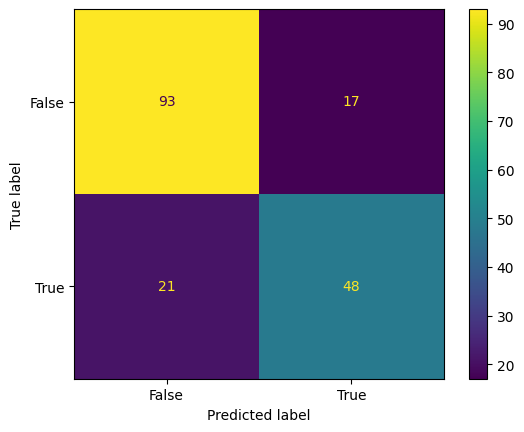

In [22]:
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [False, True])

cm_display_knn.plot()
plt.show()

In [23]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



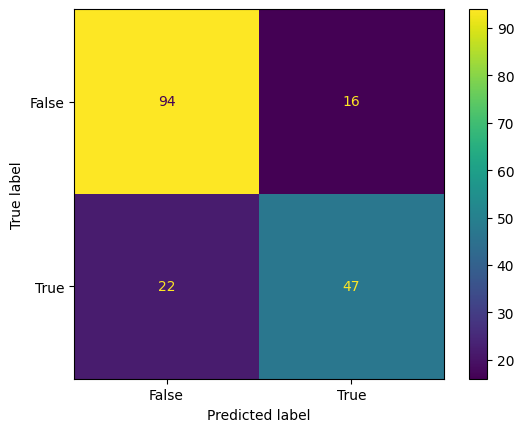

In [24]:
confusion_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)
cm_display_tree = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_tree, display_labels = [False, True])

cm_display_tree.plot()
plt.show()

In [25]:
from sklearn import svm # ada parameter c, karnell, gamma
from sklearn.ensemble import RandomForestClassifier

In [26]:
#SVM
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


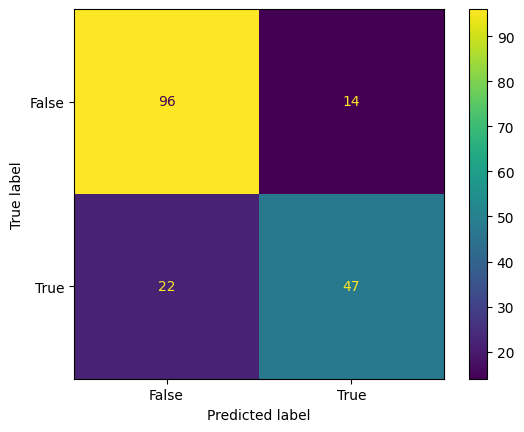

In [27]:
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = [False, True])

cm_display_svm.plot()
plt.show()

In [28]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

<ipython-input-28-4f581ce20aa8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       110
           1       0.85      0.74      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



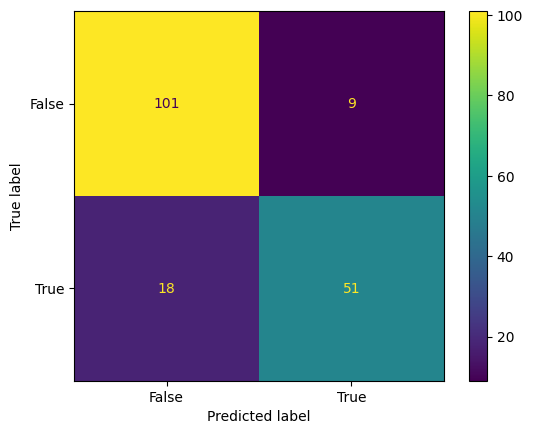

In [29]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])

cm_display_rf.plot()
plt.show()

# Melakukan optimasi

Untuk mendapatkan model terbaik

In [30]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}



scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

,model,best_score,best_params
0,svm,0.813218,"{'C': 20, 'gamma': 'auto', 'kernel': 'poly'}"
1,random_forest,0.787954,{'n_estimators': 10}
2,logistic_regression,0.797754,{'C': 1}
3,Decision_Tree,0.821580,"{'criterion': 'entropy', 'max_depth': 8, 'min_..."
4,KNN,0.785118,"{'n_neighbors': 5, 'weights': 'uniform'}"


# Modelling Optimum

In [31]:
#Decision tree
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [32]:
#Logistic regression
model_lr = LogisticRegression(C = 1)
model_lr.fit(X_train, y_train) #digunakan sebagai model
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
model_svm = svm.SVC(C = 20, gamma = 'auto', kernel = 'poly')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
model_rf = RandomForestClassifier(n_estimators = 10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

<ipython-input-35-78f4df8ae582>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}



scores = []
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

,model,best_score,best_params
0,svm,0.811819,"{'kernel': 'poly', 'gamma': 'scale', 'C': 10}"
1,random_forest,0.801980,{'n_estimators': 10}
2,logistic_regression,0.797754,{'C': 1}
3,Decision_Tree,0.814607,"{'min_samples_leaf': 2, 'max_depth': 5, 'crite..."
4,KNN,0.785118,"{'weights': 'uniform', 'n_neighbors': 5}"


# Medelling Optimum 2

In [37]:
#Decision tree
model_tree = DecisionTreeClassifier(min_samples_leaf = 6, max_depth = 5, criterion = 'gini')
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [38]:
#Logistic regression
model_lr = LogisticRegression(C = 1)
model_lr.fit(X_train, y_train) #digunakan sebagai model
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
model_knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
model_svm = svm.SVC(C = 10, gamma = 'auto', kernel = 'poly')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
model_rf = RandomForestClassifier(n_estimators = 10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

<ipython-input-41-78f4df8ae582>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



**Dari 5 model yang digunakan didapatkan yang terbaik adalah menggunakan Random Forest Classifier dengan estimator n sebesar 10. Akurasi yang didapatkan adalah sebesar 84%**